In [1]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
import matplotlib.pyplot as plt

In [2]:
# функция мнк

def lsf(x, y, functional=True):
    x_avg = np.average(x)
    y_avg = np.average(y)
    xy_avg = np.average(x * y)
    x2_avg = np.average(np.square(x))
    y2_avg = np.average(np.square(y))
    count = len(x)
    
    print('x=', x_avg, 'y=', y_avg)
    print('x2=', x2_avg, 'y2=', y2_avg, 'xy=', xy_avg)
    
    b = (xy_avg - x_avg * y_avg) / (x2_avg - x_avg ** 2)
    b_error = ((y2_avg - y_avg ** 2)/(x2_avg - x_avg ** 2) - b ** 2) ** 0.5 / count ** 0.5
    a = y_avg - b * x_avg
    a_error = b_error * (x2_avg - x_avg ** 2) ** 0.5
    
    if functional:
        f = lambda x: b * x + a
        return f, (b, a, b_error, a_error)
    
    return b, a, b_error, a_error

In [41]:
# IMPORT SPREADSHEET

spreadsheet = open("lab334-.csv")
data = pd.read_csv(spreadsheet)[0:7]
data.drop(labels = ['Unnamed: 8', 'Unnamed: 9'], axis=1, inplace=True)

In [45]:
data['1']

0     51.0
1    108.0
2    158.0
3    205.0
4    240.0
5    263.0
6    281.0
Name: 1, dtype: float64

In [39]:
# DEFINE X AXIS

teslas = np.array([242.7, 404.5, 632.3, 801.6, 921.1, 1003.1, 1028.3])

x= 719.0857142857142 y= 186.57142857142858
x2= 596703.5857142856 y2= 40997.71428571428 xy= 156303.81428571427
x= 719.0857142857142 y= 252.28571428571428
x2= 596703.5857142856 y2= 74725.14285714286 xy= 211039.75714285715
x= 719.0857142857142 y= 314.57142857142856
x2= 596703.5857142856 y2= 116653.71428571429 xy= 263648.27142857143
x= 719.0857142857142 y= 373.42857142857144
x2= 596703.5857142856 y2= 165027.42857142858 xy= 313298.27142857143
x= 719.0857142857142 y= 441.42857142857144
x2= 596703.5857142856 y2= 229812.2857142857 xy= 370057.2428571429
x= 719.0857142857142 y= 505.57142857142856
x2= 596703.5857142856 y2= 300852.4285714286 xy= 423412.9
x= 719.0857142857142 y= 570.4285714285714
x2= 596703.5857142856 y2= 383082.71428571426 xy= 477808.87142857135
x= 719.0857142857142 y= 630.1428571428571
x2= 596703.5857142856 y2= 469014.71428571426 xy= 528646.5428571429


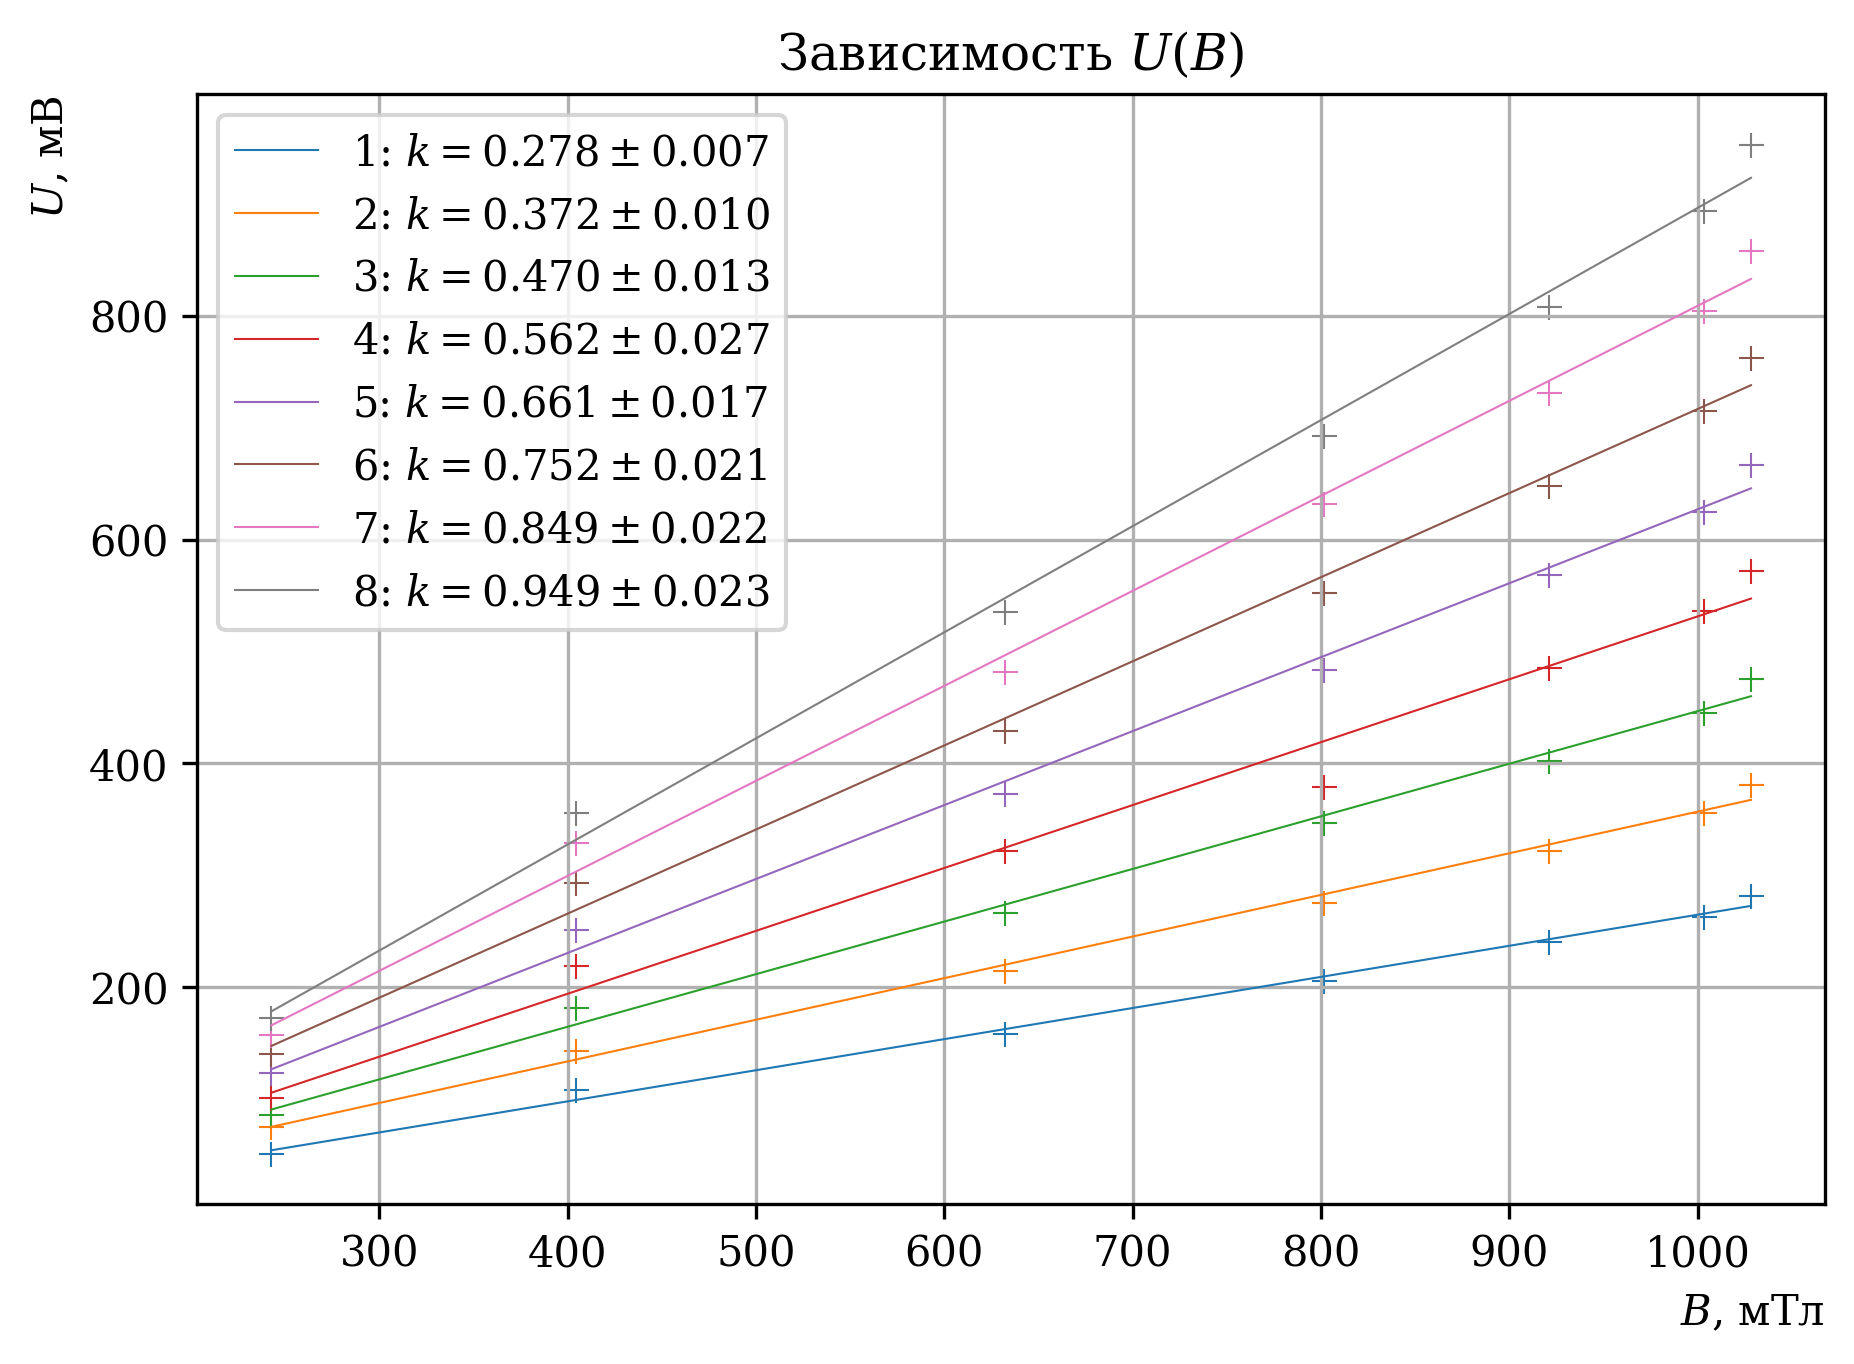

In [82]:

# f, tup = lsf(n, t)
# print(tup)
coefficients = np.zeros(8)

plt.figure(figsize=(7, 4.9), dpi=300)

# x = np.linspace(0, 100, 3)
# plt.scatter(n, t, marker='+')
# plt.plot(x, f(x))

for i in range(1, 9):
    plt.scatter(teslas, data[str(i)].to_numpy(), marker='+', lw=0.5)
    f, tup = lsf(teslas, data[str(i)].to_numpy())
    coefficients[i - 1] = tup[0]
    plt.plot(teslas, f(teslas), lw=0.5, label="{}: $k={:.3f}\pm{:.3f}$".format(i, tup[0], tup[2]))

plt.grid(True)
plt.title("Зависимость $U(B)$")
plt.xlabel("$B$, мТл", loc="right")
plt.ylabel("$U$, мВ", loc="top")
plt.legend(prop={'size':10})

# plt.xlim(-1, 13)
# plt.ylim(-0.5, 3.5)

plt.savefig('plot1.png')

x= 0.65 y= 0.6116933322107128
x2= 0.4750000000000001 y2= 0.42205888378821554 xy= 0.4477410177594214


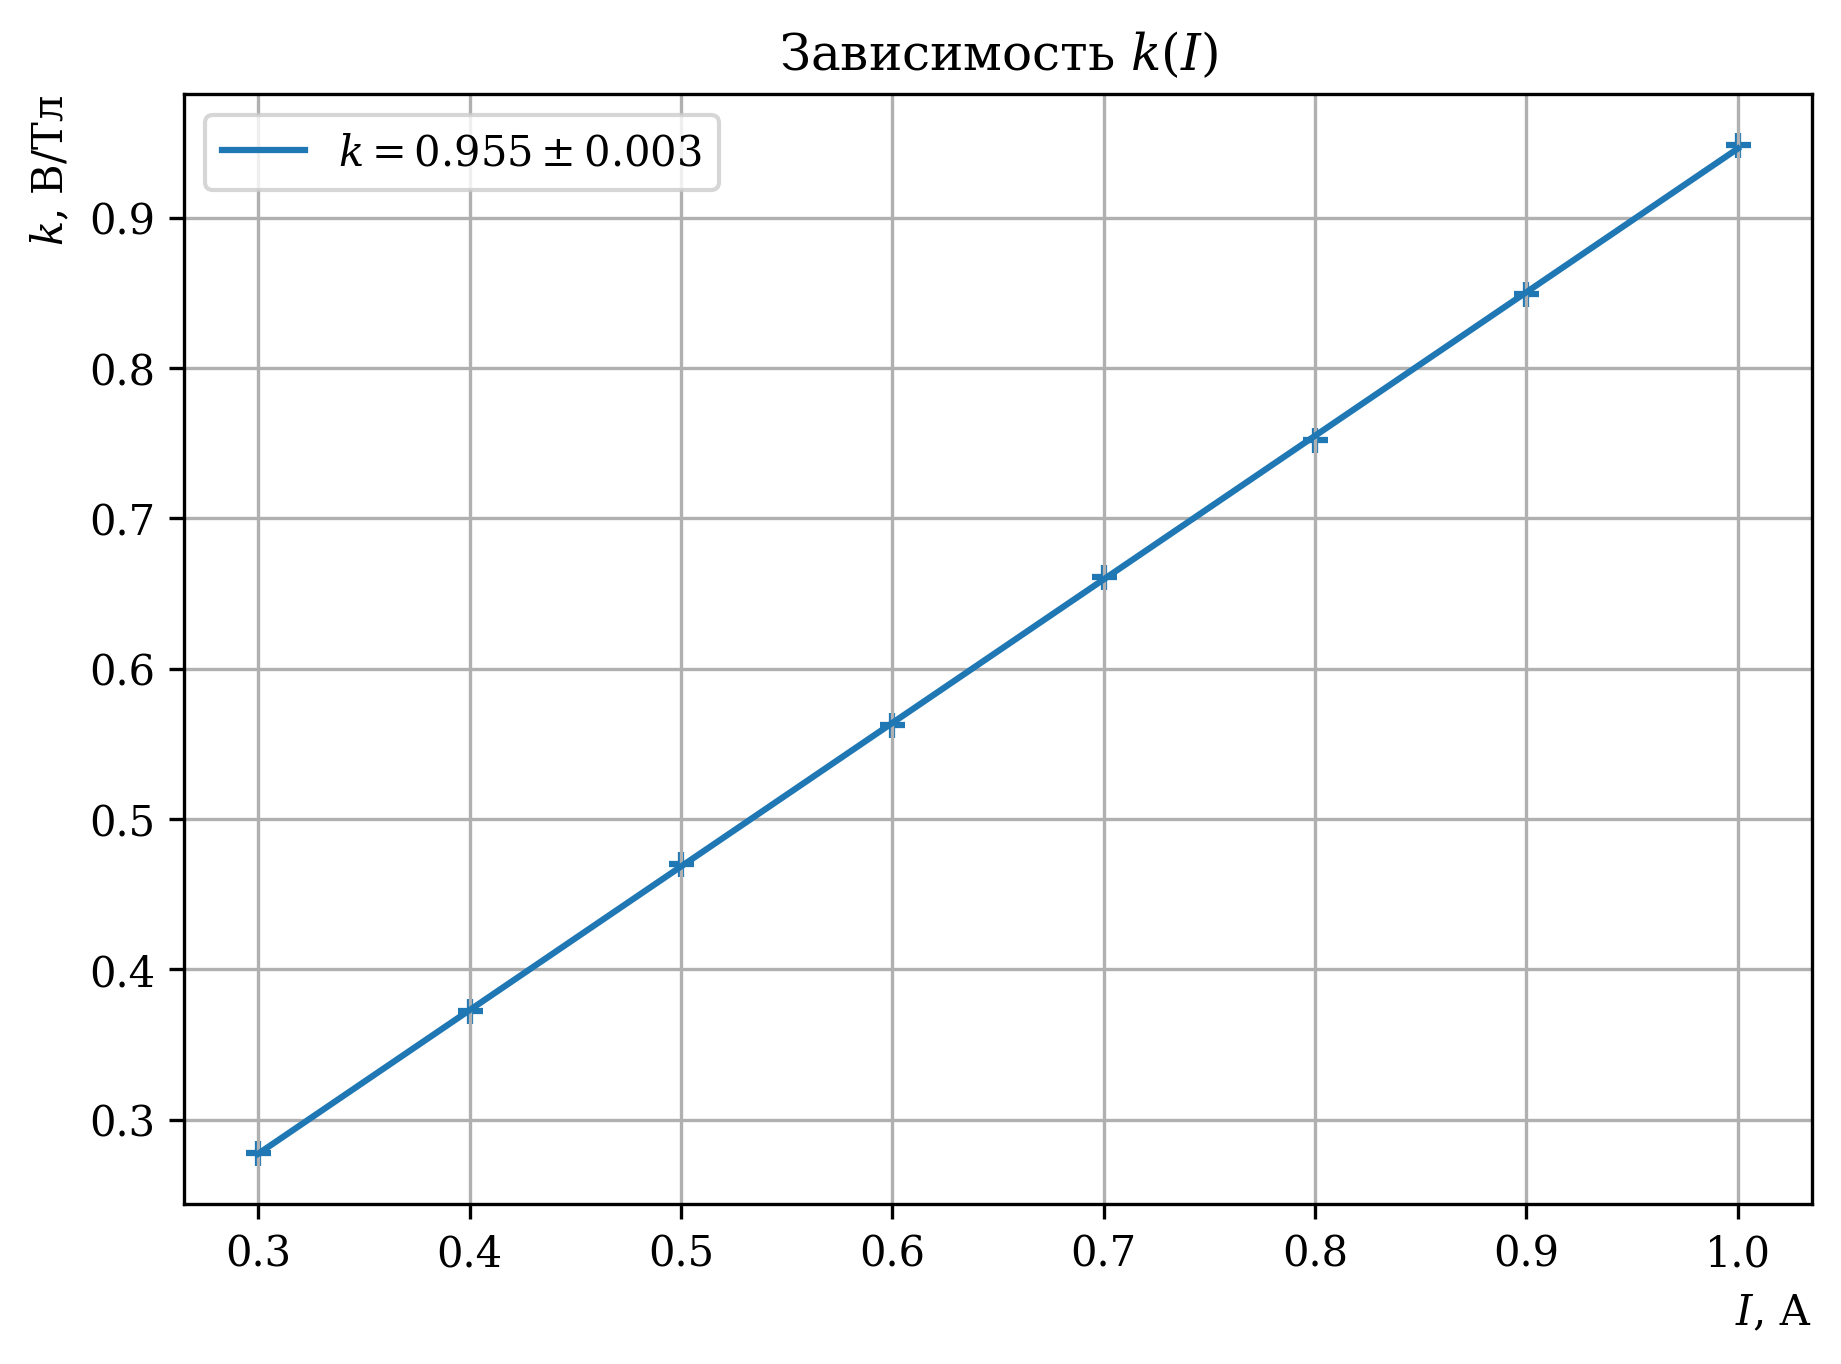

In [85]:
plt.figure(figsize=(7, 4.9), dpi=300)

# x = np.linspace(0, 100, 3)
# plt.scatter(n, t, marker='+')
# plt.plot(x, f(x))
amperage = np.array([0.1 * i for i in range (3, 11)])

plt.scatter(amperage, coefficients, marker='+')
f, tup = lsf(amperage, coefficients)
plt.plot(amperage, f(amperage), label="$k = {:.3f} \pm {:.3f}$".format(tup[0], tup[2]))

plt.grid(True)
plt.title("Зависимость $k(I)$")
plt.xlabel("$I$, А", loc="right")
plt.ylabel("$k$, В/Тл", loc="top")
plt.legend(prop={'size':10})

plt.savefig('plot2.png')